In [7]:
%matplotlib inline
import PIL as PIL

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
im = PIL.Image.open('input1.bmp')
im = np.asarray(im)
im2 = PIL.Image.open('input2.bmp')
im2 = np.asarray(im2)
im3 = PIL.Image.open('input3.bmp')
im3 = np.asarray(im3)
im4 = PIL.Image.open('input4.bmp')
im4 = np.asarray(im4)
from skimage import filters
from skimage import data,exposure,color
from skimage.morphology import disk
from skimage.filters.rank import median

### 中值濾波去除椒鹽雜訊

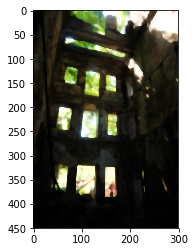

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


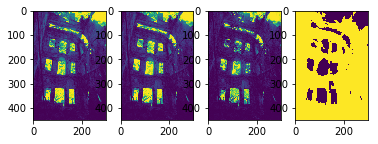

In [129]:
med = im.copy()
med[:,:,0] = median(im[:,:,0], disk(3))
med[:,:,1] = median(im[:,:,1], disk(3))
med[:,:,2] = median(im[:,:,2], disk(3))
plt.imshow(med)
plt.show()

mask = med[:,:,2].copy()
mask = mask<40
f,ax = plt.subplots(1,4)
for i in range(3):
    ax[i].imshow(im[:,:,i])
ax[3].imshow(mask)
f.show()

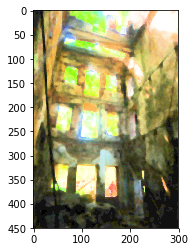

In [135]:
im_hsv = color.rgb2hsv(med)
med_eq = im_hsv.copy()
med_eq[:,:,2] = exposure.equalize_hist(im_hsv[:,:,2],mask=mask)
med_eq_rgb = (color.hsv2rgb(med_eq)*255).astype(np.uint8)
plt.imshow(med_eq_rgb)
plt.show()

In [ ]:
med2 = im2.copy()
med2[:,:,0] = median(im2[:,:,0], disk(3))
med2[:,:,1] = median(im2[:,:,1], disk(3))
med2[:,:,2] = median(im2[:,:,2], disk(3))
plt.imshow(med2)
plt.grid(False)
plt.show()

f,ax = plt.subplots(1,3)

for i in range(3):
    ax[i].grid(False)
    ax[i].imshow(im2[:,:,i])

f.show()
f,ax = plt.subplots(3,1)
ax[0].hist(im2[:,:,0].flatten(),bins=256,color='R',normed=True)
ax[1].hist(im2[:,:,1].flatten(),bins=256,color='G',normed=True)
ax[2].hist(im2[:,:,2].flatten(),bins=256,color='B',normed=True)
f.show()

In [63]:
im_hsv2 = color.rgb2hsv(med2)
med_eq2 = im_hsv2.copy()
med_eq2[:,:,2] = exposure.equalize_hist(im_hsv2[:,:,2])
med_eq2[:,:,2]-=0.05
med_eq2[:,:,1]+=0.02
med_eq2[med_eq2<0] = 0
med_eq_rgb2 = (color.hsv2rgb(med_eq2)*255).astype(np.uint8)

In [64]:
np.mean(im_hsv2[:,:,0])

0.31056848282860133

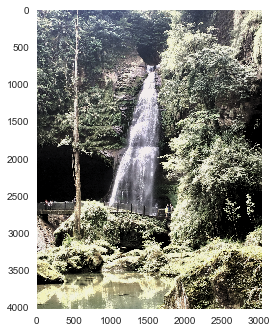

In [65]:
plt.imshow(med_eq_rgb2)
plt.grid(False)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


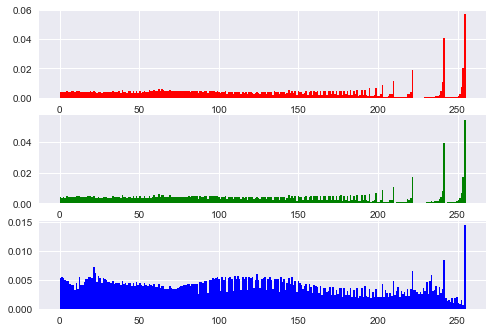

In [27]:
f,ax = plt.subplots(3,1)
ax[0].hist(med_eq_rgb2[:,:,0].flatten(),bins=256,color='R',normed=True)
ax[1].hist(med_eq_rgb2[:,:,1].flatten(),bins=256,color='G',normed=True)
ax[2].hist(med_eq_rgb2[:,:,2].flatten(),bins=256,color='B',normed=True)
f.show()

In [13]:
bin_centers

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18